In [1]:
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
from konlpy.tag import Okt # 형태소 분석기 Okt
from collections import Counter

In [2]:
# 파일들의 경로
path = 'C:/Users/samsung/OneDrive - 서울과학기술대학교/바탕 화면/'

# csv 파일 불러오기
df=pd.read_csv(path+"reviews_total.csv")
df2=pd.read_csv(path+"reviews_ranking.csv")
k_stopword=pd.read_csv(path+"korean_stopword.csv")
k_stopword=list(k_stopword['불용어'])
k_stopword.append('영화')
k_stopword.append('더')

# mask로 쓸 이미지 파일 부르기
img1 = path+'Rotten_Tomatoes.png'
img2 = path+'Rotten_Tomatoes_rotten.png'
mask_p = np.array(Image.open(img1))
mask_n = np.array(Image.open(img2))

In [3]:
# rate가 문자인 경우 삭제, 이상한 단어 삭제
df['rate']=df['rate'].str.replace(pat=r'[ㄱ-ㅣ가-힣]+', repl= r'', regex=True)
df=df[df.rate!='']
df['review']=df['review'].astype(str)
df['rate']=df['rate'].astype(float)

# label 열 추가, rate가 3.5이상일때 label==1, 미만일때 label==0
df['label']=np.select([df.rate>=3.5],[1],default=0)

# tokenizer 열 추가
tokenizer = Okt()
df['tokenized'] = df['review'].apply(tokenizer.nouns)

In [4]:
# df 형태 (수정된 reviews_ranking)
df

,reviewer,rate,review,movie_title,label,tokenized
0,기태,3.0,솔직히 말해도 됨?불한당 때부터 변성현 취향 진짜 빻았다고 생각함근데내 취향이 더 ...,길복순,0,"[말, 불한당, 때, 변, 성현, 취향, 진짜, 빻았다, 생각, 함, 취향, 더, ..."
1,박준영 (영화 담다),3.5,액션을 품은 멜로 드라마이자 성장 영화.예상 할 수 있을 이야기를 조금씩 꼬아가면서...,길복순,1,"[액션, 멜로, 드라마, 이자, 성장, 영화, 예상, 수, 이야기, 꼬, 가면, 차..."
2,재원,3.0,겉멋과 허세마저 스타일리쉬하고 섹시하게 보이도록 하는 전도연과 설경구의 앙상블.,길복순,0,"[겉멋, 허세, 스타, 일리, 쉬, 전도연, 설경구, 앙상블]"
3,빡치고짜증나는작품만코멘트함,0.5,전도연한테 감사해라,길복순,0,[전도연]
4,이동진 평론가,2.0,"제대로 작동하지 않는 그 아이러니한 세계, 온전히 배어들지 못한 그 쿨한 스타일.",길복순,0,"[제대로, 작동, 그, 아이러니, 세계, 못, 그, 스타일]"
...,...,...,...,...,...,...
1694,무비네컷,5.0,어른이 되어서도 터널 속 세계를 잊지 못하게하는 경험,센과 치히로의 행방불명,1,"[어른, 터널, 속, 세계, 경험]"
1695,금은동이시네마,4.5,인생 최초의 애니메이션언제나 몇번이라도 다시 생각나겠지,센과 치히로의 행방불명,1,"[인생, 최초, 애니메이션, 몇번, 다시]"
1696,seunee,5.0,어릴 적부터 수많은 시간을 함께 한 내 생의 최고의 애니메이션. 환상에 빠지다 보면...,센과 치히로의 행방불명,1,"[적, 시간, 내, 생, 최고, 애니메이션, 환상, 더, 실제, 판타지, 이, 작품..."
1697,잇츄,2.5,난 이미 쪄들었어.나.. 일본애니랑 안맞나봐,센과 치히로의 행방불명,0,"[난, 나, 일본애니]"


In [5]:
# df2 형태 (reviews_total)
df2

,rank,title,mean_rate,movies_link,img,year,country,genre,time,regulation,description
0,1,에이전트 A.K.A.,2.7,https://pedia.watcha.com/ko-KR/contents/m5aggMv,https://an2-img.amz.wtchn.net/image/v2/W5SKzQd...,2023,프랑스,액션,2시간 2분,청불,"한 치도 흔들림이 없는 특수 작전 요원. 하지만 범죄 조직 침투 임무 중, 우연히 ..."
1,2,길복순,3.0,https://pedia.watcha.com/ko-KR/contents/mW42G6l,https://an2-img.amz.wtchn.net/image/v2/lZnOM6f...,2023,한국,액션,2시간 17분,청불,회사에선 이름난 암살자. 집에선 십 대 딸을 둔 싱글맘. 죽이는 일? 그거야 쉽다....
2,3,스위치,2.8,https://pedia.watcha.com/ko-KR/contents/md7Yzyv,https://an2-img.amz.wtchn.net/image/v2/z-ey0m9...,2021,한국,코미디,1시간 52분,12세,"하룻밤 사이, 인생이 180도 뒤집어졌다! 캐스팅 0순위 천만배우이자 자타공인 최..."
3,4,코드 8,2.5,https://pedia.watcha.com/ko-KR/contents/m53m3y6,https://an2-img.amz.wtchn.net/image/v2/JXYu_SU...,2019,캐나다,액션,1시간 38분,15세,"“본 모습대로 살아. 원하는 게 보이면 가져” 근 미래, 인류의 4%뿐인 초능력자 ..."
4,5,헝거,2.6,https://pedia.watcha.com/ko-KR/contents/mdKppBJ,https://an2-img.amz.wtchn.net/image/v2/TXoIXbe...,2023,태국,스릴러,2시간 10분,15세,뛰어난 재능을 지닌 젊은 길거리 음식점 요리사. 인정사정없는 유명 셰프에게서 트레이...
5,6,백야행 - 하얀 어둠 속을 걷다,3.0,https://pedia.watcha.com/ko-KR/contents/mBOkvgW,https://an2-img.amz.wtchn.net/image/v2/06tVJa5...,2009,한국,드라마,2시간 15분,청불,출소한 지 얼마 안된 한 남자가 잔인하게 살해당한다. 이 사건이 14년 전 발생한 ...
6,7,"므이: 저주, 돌아오다",1.5,https://pedia.watcha.com/ko-KR/contents/mdEmryl,https://an2-img.amz.wtchn.net/image/v2/XKkAHgw...,2022,베트남,드라마,1시간 35분,15세,저주 받은 초상화! 항과 린은 어릴 적부터 친 자매처럼 같이 지낸 친구다. 어느덧 ...
7,8,크리스마스 캐럴,2.3,https://pedia.watcha.com/ko-KR/contents/m5agxNv,https://an2-img.amz.wtchn.net/image/v2/KEcjqvP...,2022,한국,드라마,2시간 11분,청불,"폭력이 만들어낸 괴물! 복수를 위한 잔혹한 싸움이 시작된다! 크리스마스 아침, 쌍둥..."
8,9,극한직업,4.2,https://pedia.watcha.com/ko-KR/contents/mdMBlkR,https://an2-img.amz.wtchn.net/image/v2/OivZbOI...,2018,한국,코미디,1시간 51분,15세,"불철주야 달리고 구르지만 실적은 바닥, 급기야 해체 위기를 맞는 마약반. 더 이상 ..."
9,10,센과 치히로의 행방불명,4.3,https://pedia.watcha.com/ko-KR/contents/my5YGwO,https://an2-img.amz.wtchn.net/image/v2/3A4qOu7...,2001,일본,애니메이션,2시간 6분,전체,평범한 열 살 짜리 소녀 치히로 식구는 이사 가던 중 길을 잘못 들어 낡은 터널을 ...


에이전트 A.K.A.
길복순


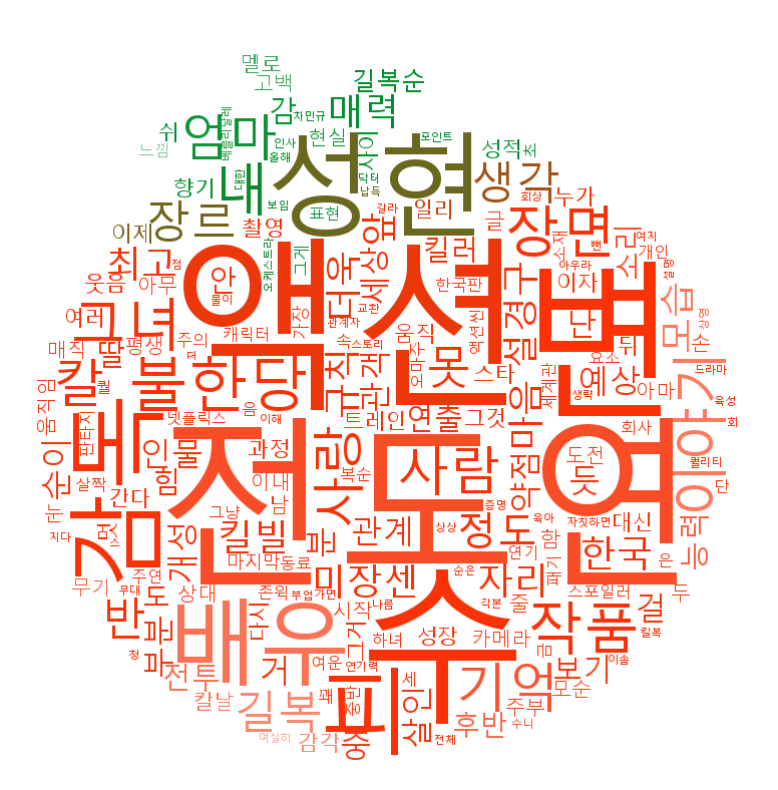

<Figure size 640x480 with 0 Axes>

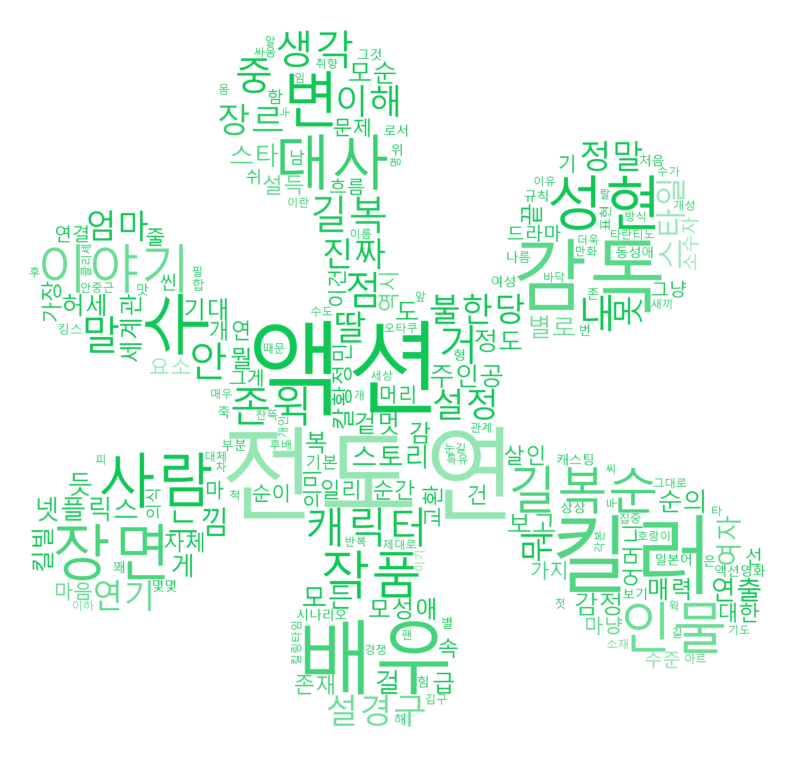

스위치


<Figure size 640x480 with 0 Axes>

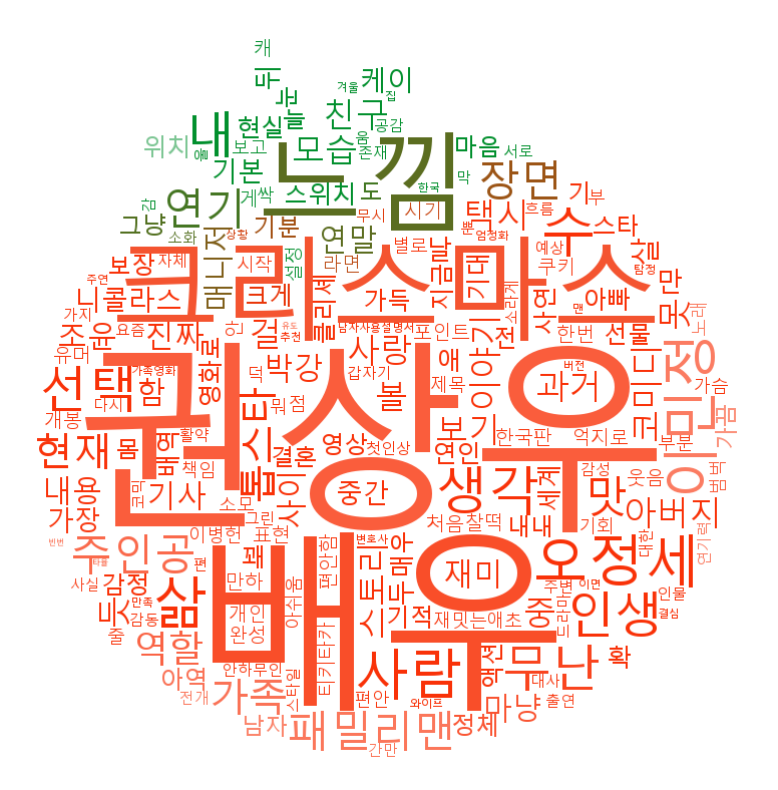

<Figure size 640x480 with 0 Axes>

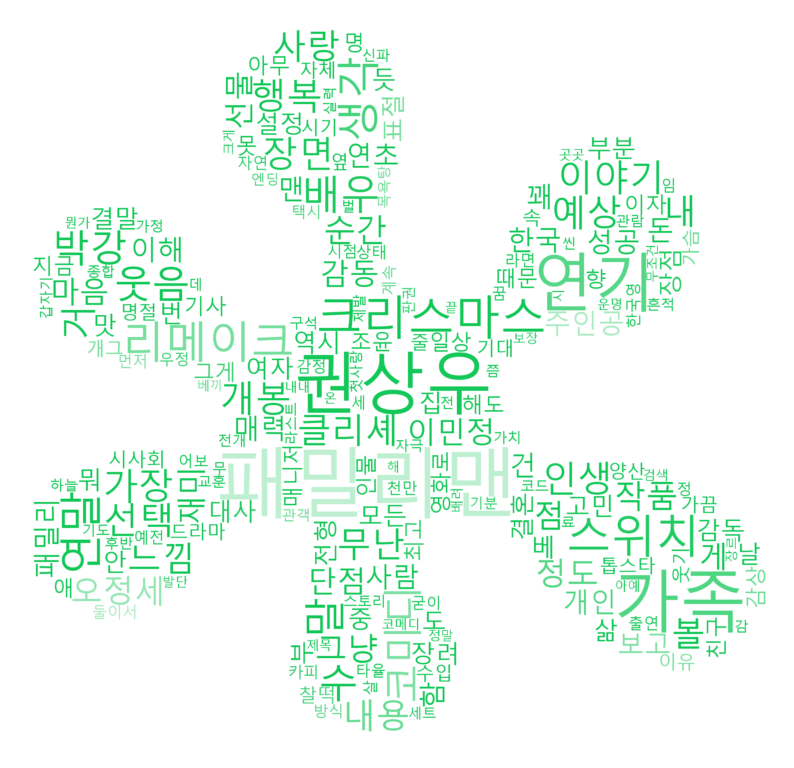

코드 8


<Figure size 640x480 with 0 Axes>

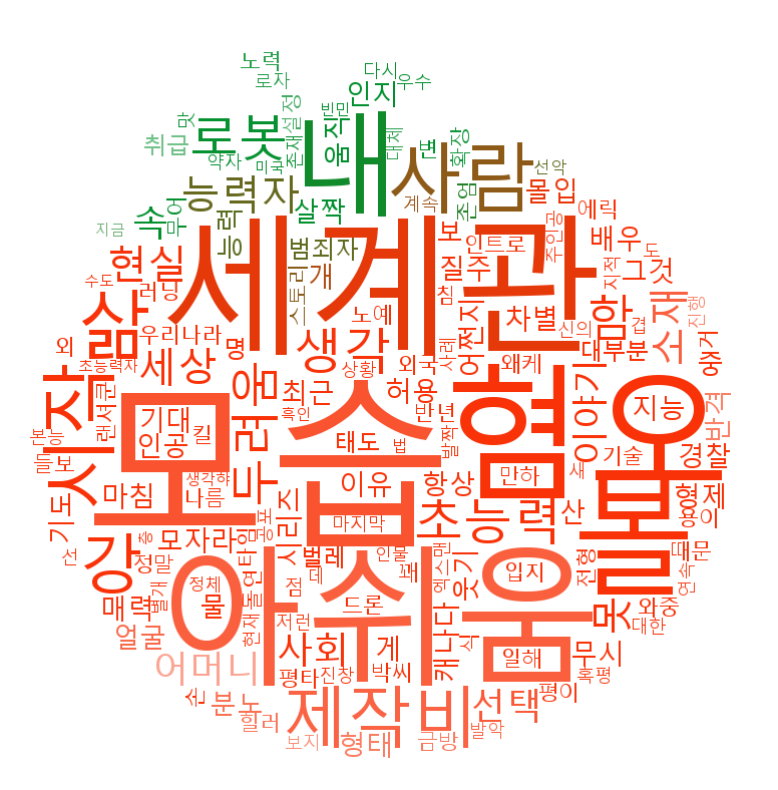

<Figure size 640x480 with 0 Axes>

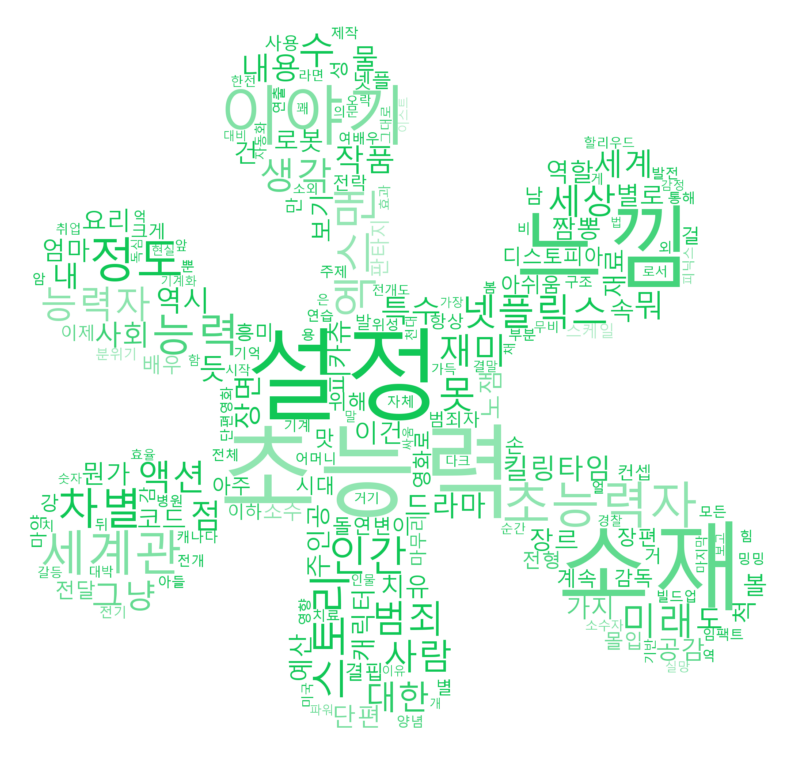

헝거


<Figure size 640x480 with 0 Axes>

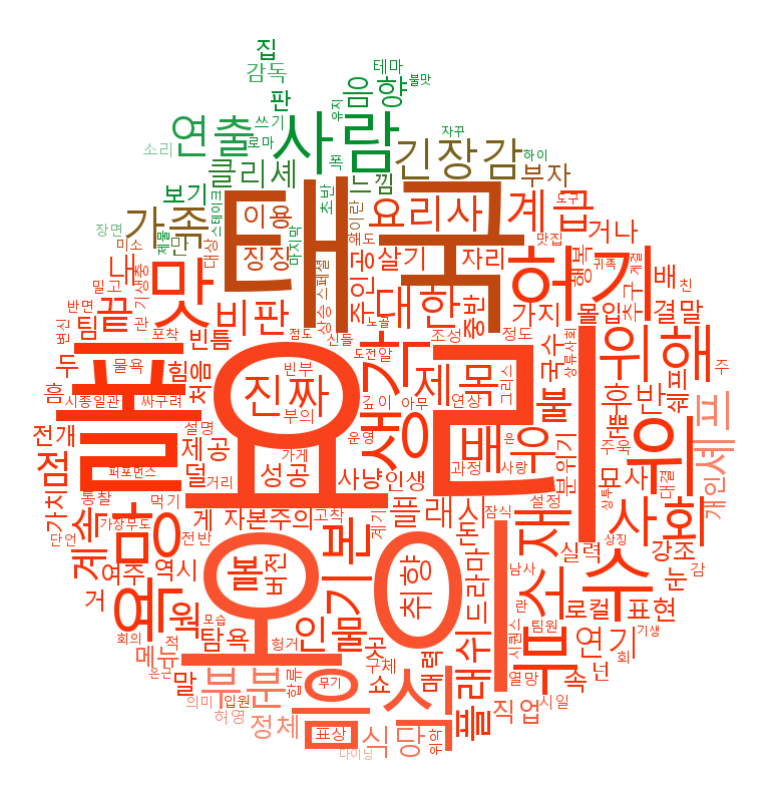

<Figure size 640x480 with 0 Axes>

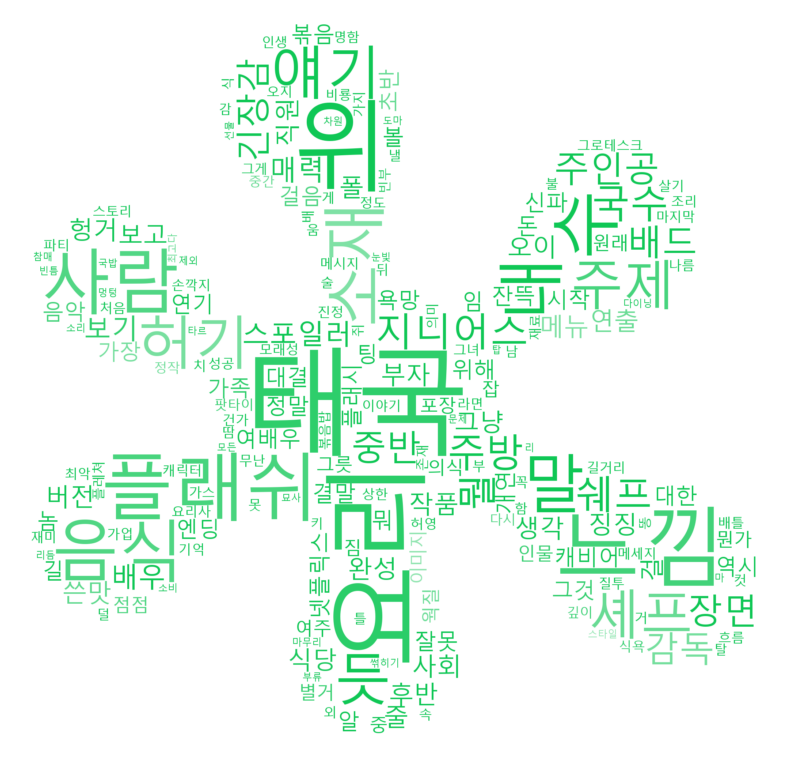

백야행 - 하얀 어둠 속을 걷다


<Figure size 640x480 with 0 Axes>

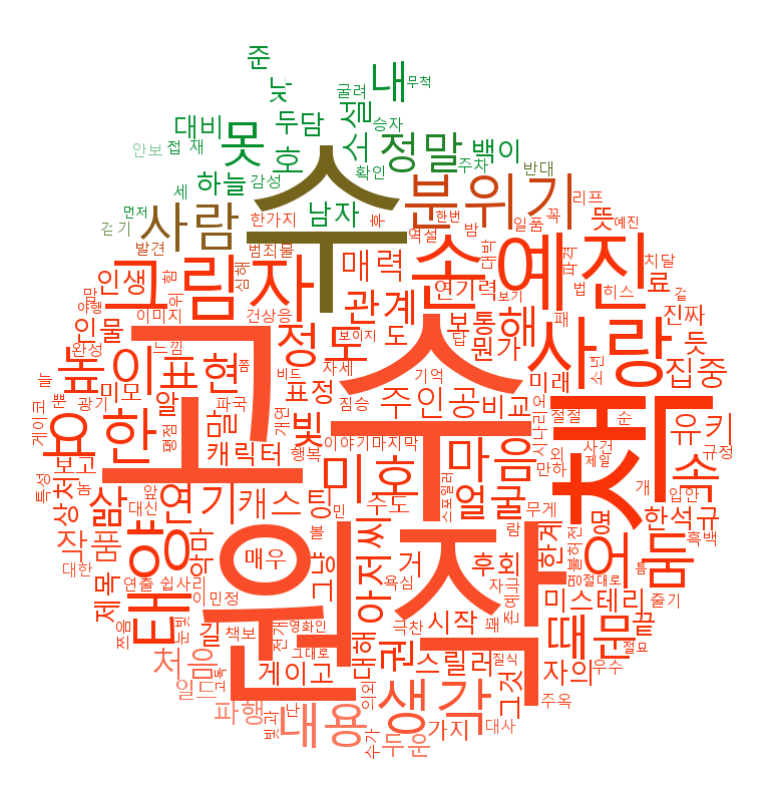

<Figure size 640x480 with 0 Axes>

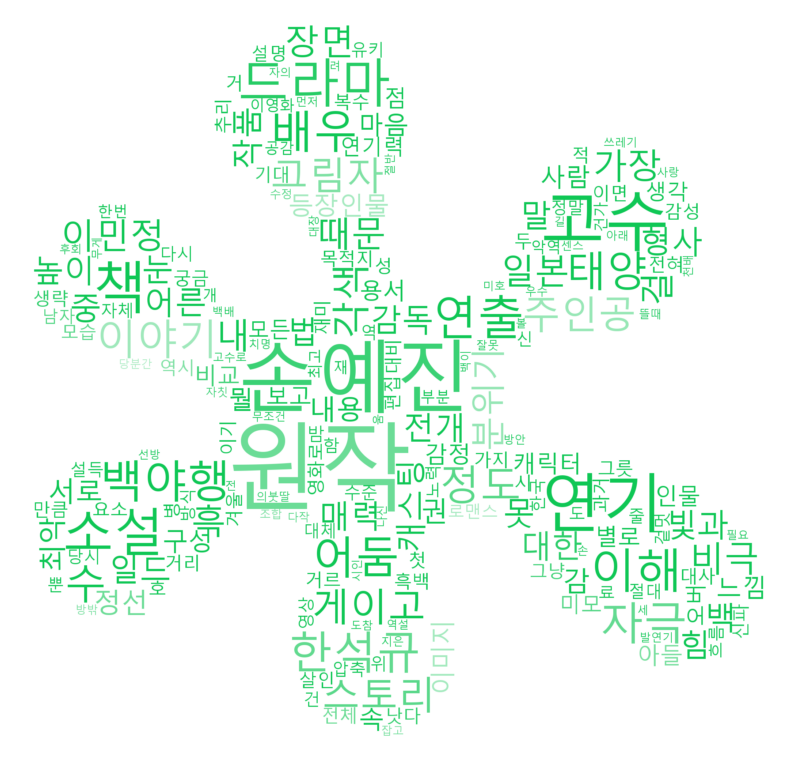

므이: 저주, 돌아오다
크리스마스 캐럴


<Figure size 640x480 with 0 Axes>

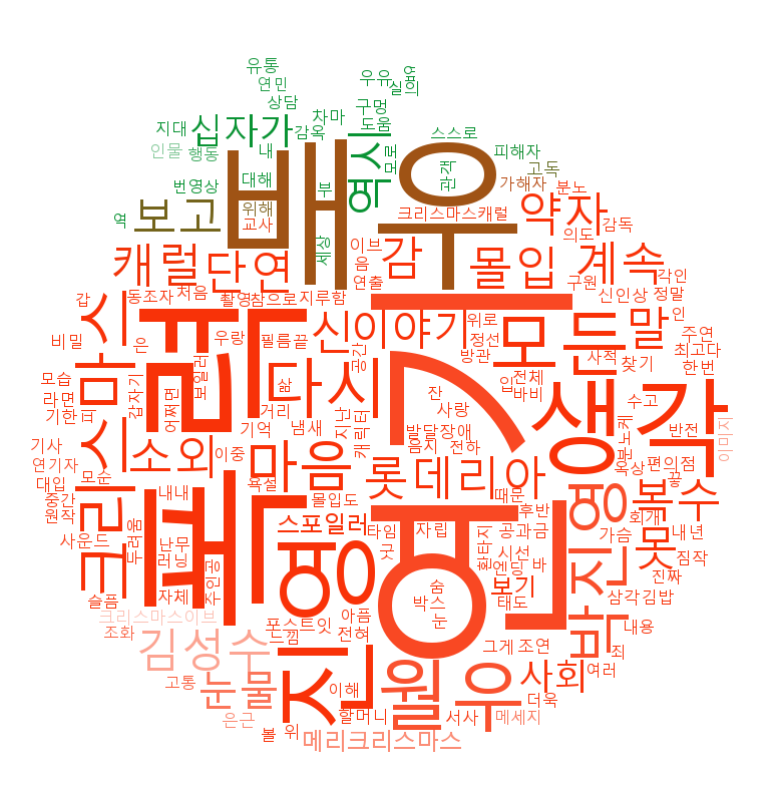

<Figure size 640x480 with 0 Axes>

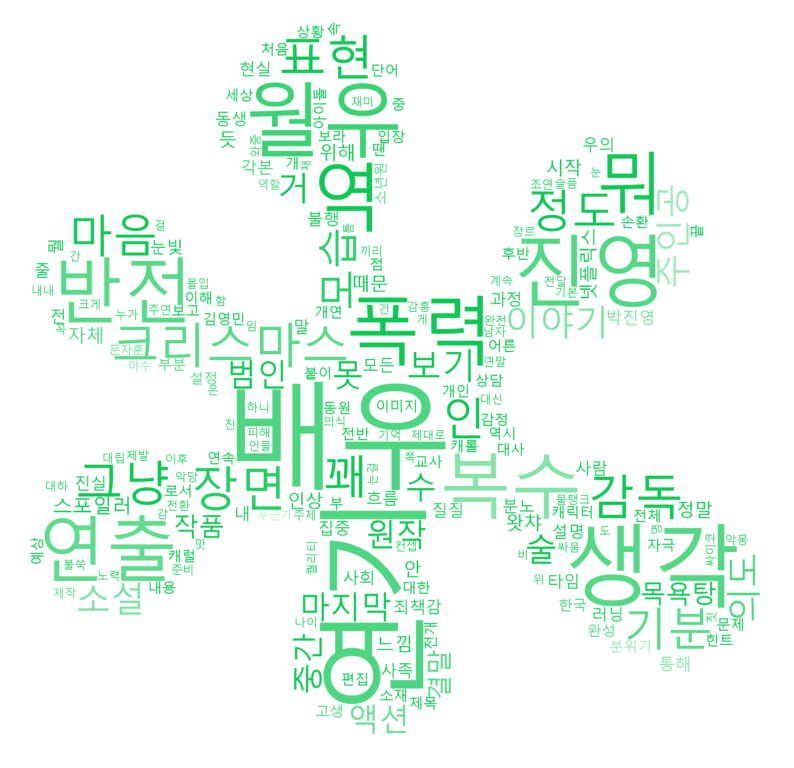

극한직업


<Figure size 640x480 with 0 Axes>

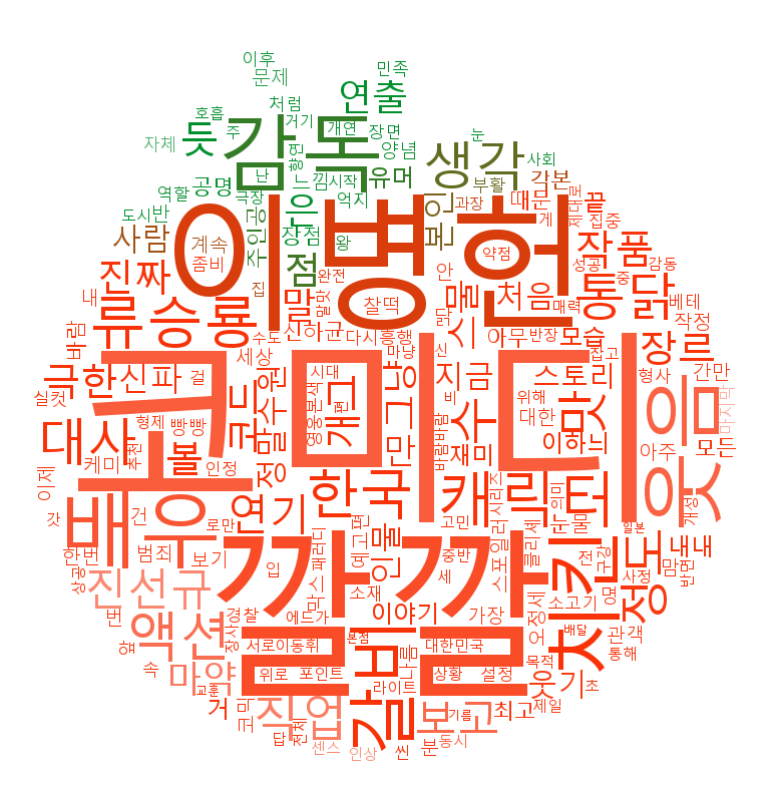

<Figure size 640x480 with 0 Axes>

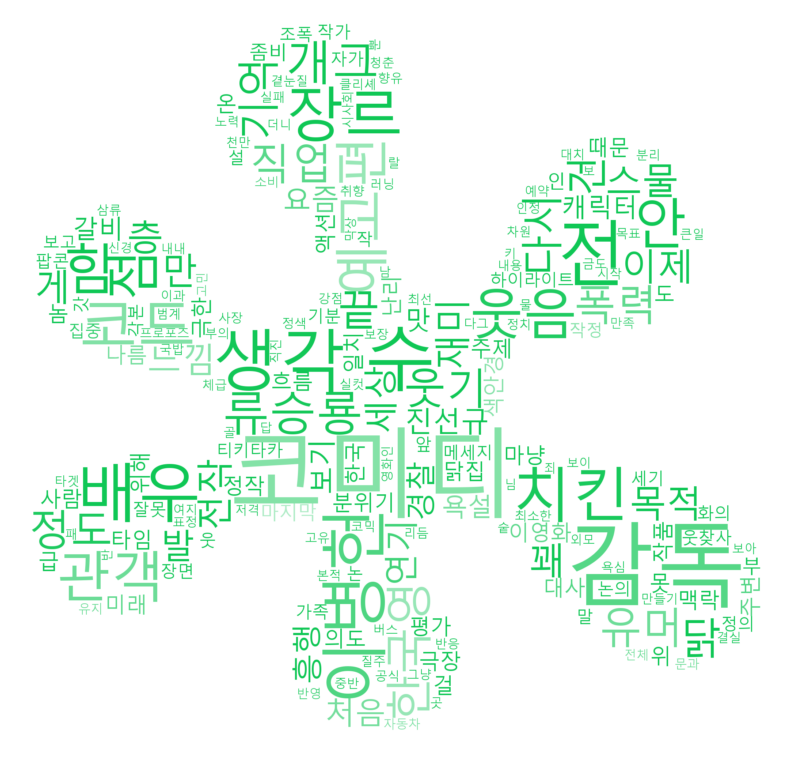

센과 치히로의 행방불명


<Figure size 640x480 with 0 Axes>

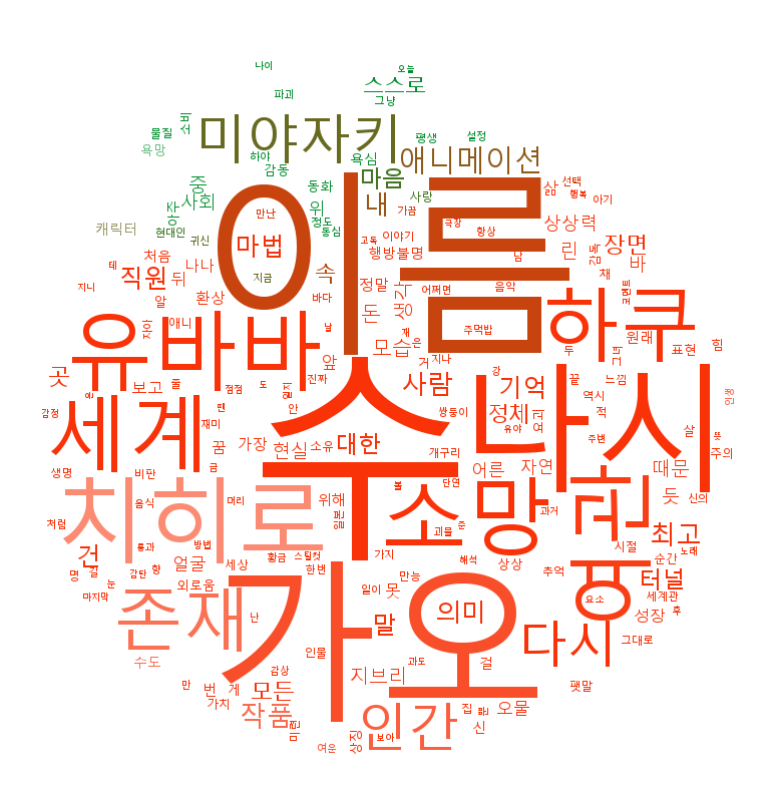

<Figure size 640x480 with 0 Axes>

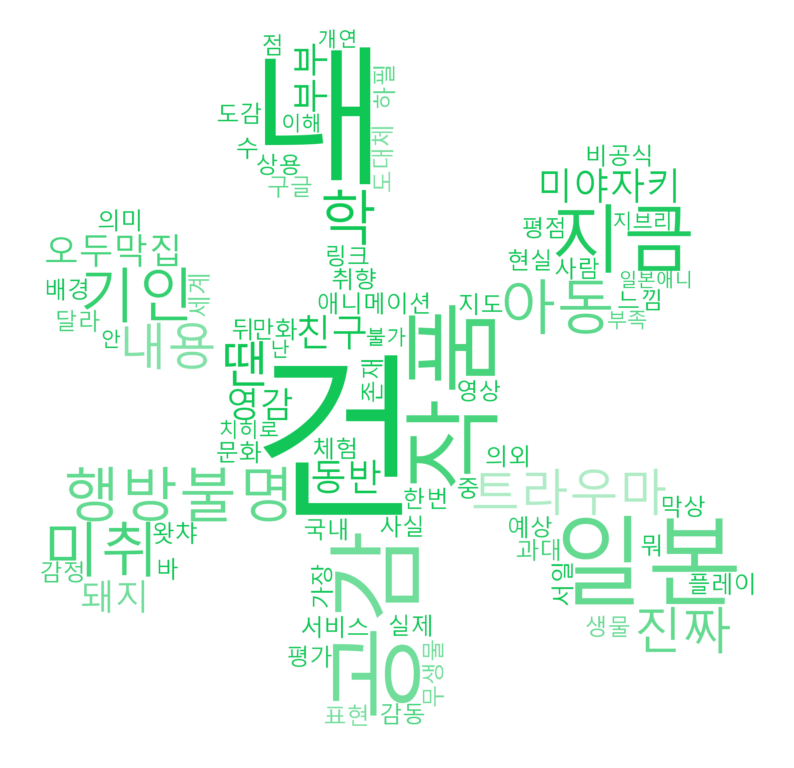

<Figure size 640x480 with 0 Axes>

In [6]:
# 영화 랭킹 순으로 긍정, 부정 워드 클라우드 만들기
for i in range(0,len(df2)):

    # 해당 영화 제목 출력
    print(df2['title'][i])

    # 해당 영화의 리뷰들만 가져와서 새로운 df3에 저장
    df3=df.loc[df['movie_title']==df2['title'][i]]
    
    # 해당 영화에 리뷰가 없을경우 continue
    if len(df3)==0:
        continue

    positive_reviews = np.hstack(df3[df3['label']==1]['tokenized'].values)
    negative_reviews = np.hstack(df3[df3['label']==0]['tokenized'].values)

    positive_count=Counter(positive_reviews)
    negative_count=Counter(negative_reviews)


    rank_text_p=dict(positive_count)
    # count_len=5
    # temp_dic_p={}

    # 빈도 5 이하 단어 제거
    # for key,value in positive_count.items():
    #     if value>count_len:
    #         temp_dic_p[key]=value
    # rank_text_p=temp_dic_p

    rank_text_n=dict(negative_count)
    # temp_dic_n={}
    # for key,value in negative_count.items():
    #     if value>count_len:
    #         temp_dic_n[key]=value
    # rank_text_n=temp_dic_n

    # 불용어 제거
    temp_dic_p={}

    for key, value in rank_text_p.items():
        if key not in k_stopword:
            temp_dic_p[key]=value

    temp_dic_n={}
    for key, value in rank_text_n.items():
        if key not in k_stopword:
            temp_dic_n[key]=value


    wordcloud_p = WordCloud(
        font_path ='/Windows/Fonts/malgun.ttf',
        width = 500,
        height = 500,
        background_color="white",
        mask = mask_p
    )

    wordcloud_n = WordCloud(
        font_path ='/Windows/Fonts/malgun.ttf',
        width = 500,
        height = 500,
        background_color="white",
        mask = mask_n
    )

    wordcloud_p = wordcloud_p.generate_from_frequencies(temp_dic_p)
    wordcloud_n = wordcloud_n.generate_from_frequencies(temp_dic_n)
    image_colors_p = ImageColorGenerator(mask_p)
    image_colors_n = ImageColorGenerator(mask_n)

    # 해당 영화의 긍정리뷰 이미지 저장
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud_p.recolor(color_func=image_colors_p), interpolation="bilinear")
    plt.axis("off")
    # plt.show()
    # 파일명은 'positive_[영화명].png' 형식으로 저장 
    plt.savefig(path+'positive_'+df2['title'][i]+'.png')

    # 해당 영화의 부정리뷰 이미지 저장
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud_n.recolor(color_func=image_colors_n), interpolation="bilinear")
    plt.axis("off")
    # plt.show()
    # 파일명은 'negative_[영화명].png' 형식으로 저장 
    plt.savefig(path+'negative_'+df2['title'][i]+'.png')